In [41]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [43]:
from sklearn import tree
from sklearn.datasets import load_iris
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency 
from sklearn.preprocessing  import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score
import plotly.express as px
from sklearn.preprocessing import LabelEncoder


In [44]:
# Load the dataset
fungi = pd.read_csv('Resources/mushrooms.csv')


In [45]:
fungi

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Cleaning up dataset                        

# Checking out the Mushroom Dataframe

This shows the names of the columns

In [46]:
fungi.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

This shows the number of columns

In [47]:
fungi.shape[1]

23

This shows the number of rows 

In [48]:
fungi.shape[0]

8124

This shows basic statistics for numeric columns

In [49]:
fungi.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [50]:
def hide_spines(ax, spines=["top", "right", "left", "bottom"]):
    for spine in spines:
        ax.spines[spine].set_visible(False)

## Playing with some colors

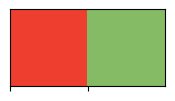

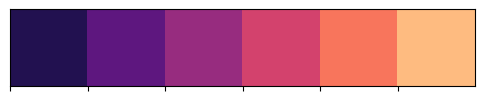

In [51]:
colors = ["#ED3E2F", "#85BB65"]
magma = sns.color_palette("magma")
sns.palplot(colors)
sns.palplot(magma)

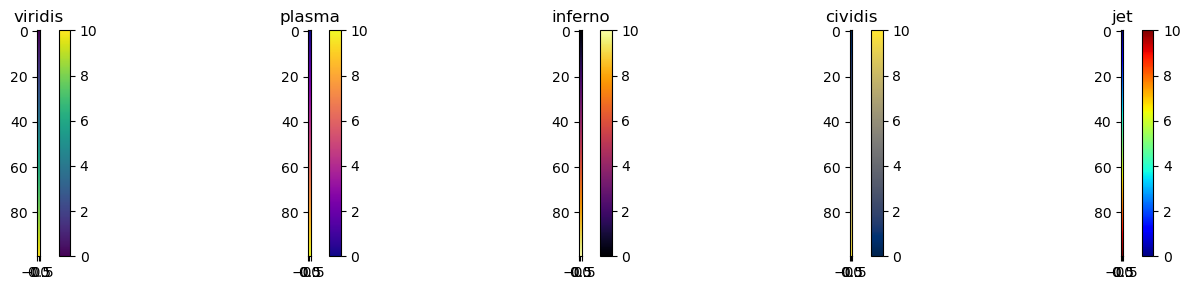

In [52]:
# Create a figure and axis for the colorbars
fig, axs = plt.subplots(1, 5, figsize=(15, 3))

# Create a list of colormaps
colormaps = ['viridis', 'plasma', 'inferno', 'cividis', 'jet']

# Create a dummy plot to generate colorbars
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100).reshape(-1, 1)

for i, cmap in enumerate(colormaps):
    # Plot the colorbar
    im = axs[i].imshow(y, cmap=cmap)
    axs[i].set_title(cmap)
    fig.colorbar(im, ax=axs[i], orientation='vertical')

plt.tight_layout()
plt.show()


## Mushroom Data

### Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff(brownish-yellow)=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

# Mushroom Class Analysis

In [ ]:
fig = plt.figure(figsize=(7, 7))
fig.set_facecolor("#FFC0CB")

ax = fig.add_subplot()
ax.set_facecolor("#FFC0CB")

sns.countplot(x="class", data=fungi, palette=colors, ec="#800080", alpha=1, linewidth=1.25, zorder=2, ax=ax)
ax.grid(axis="y", linewidth=1.5, color="purple", linestyle="--", zorder=0)
ax.xaxis.set_tick_params(size=0, labelsize=14, pad=7)
ax.set_xlabel("Class", fontsize=17, fontfamily="serif", labelpad=7)
ax.yaxis.set_tick_params(size=0, labelsize=12, pad=7)
ax.set_ylabel("Count", fontsize=14, fontfamily="serif", labelpad=7)
hide_spines(ax, spines=["top", "right", "left"])
ax.spines["bottom"].set(linewidth=2.5)

ax.set_title("Mushroom Class Distribution", fontsize=20, fontweight="bold", fontfamily="serif", loc="left")
ax.set_ylim(1)
fig.show()

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



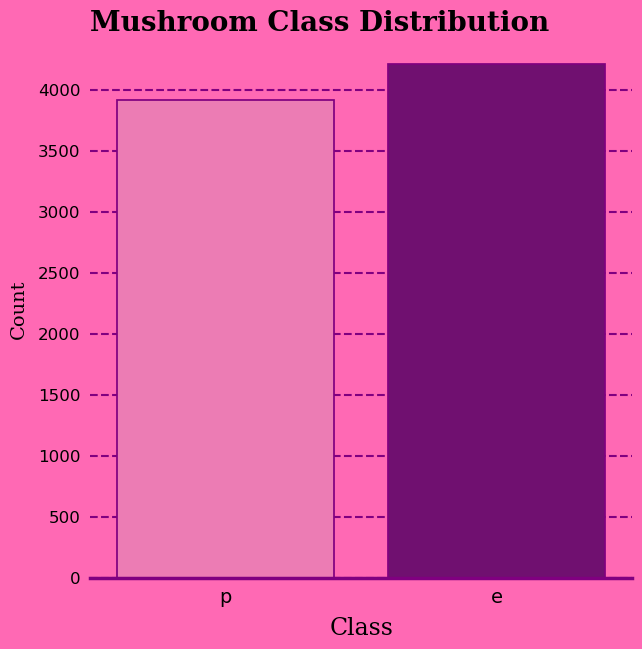

In [53]:

# Define pink and purple colors
pink = "#FF69B4"  # Hot pink
purple = "#800080"  # Purple

# Create the figure and set background color to pink
fig = plt.figure(figsize=(7, 7))
fig.set_facecolor(pink)

# Add subplot with pink background
ax = fig.add_subplot()
ax.set_facecolor(pink)

# Define seaborn palette with pink and purple
colors = [pink, purple]

# Plot countplot with pink and purple palette
sns.countplot(x="class", data=fungi, palette=colors, ec=purple, alpha=1, linewidth=1.25, zorder=2, ax=ax)

# Customize grid
ax.grid(axis="y", linewidth=1.5, color=purple, linestyle="--", zorder=0)

# Customize tick parameters
ax.xaxis.set_tick_params(size=0, labelsize=14, pad=7)
ax.set_xlabel("Class", fontsize=17, fontfamily="serif", labelpad=7)
ax.yaxis.set_tick_params(size=0, labelsize=12, pad=7)
ax.set_ylabel("Count", fontsize=14, fontfamily="serif", labelpad=7)

# Hide spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# Customize bottom spine
ax.spines["bottom"].set(linewidth=2.5, color=purple)

# Set title
ax.set_title("Mushroom Class Distribution", fontsize=20, fontweight="bold", fontfamily="serif", loc="left")

# Ensure y-axis starts from 0
ax.set_ylim(0)

# Show the plot
plt.show()


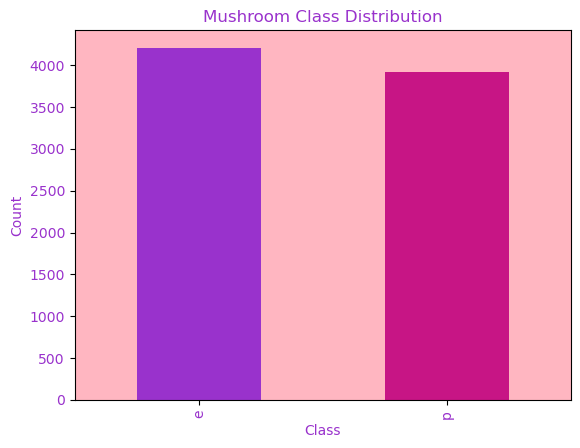

In [54]:
colors = {'p': 'darkorchid', 'e': 'mediumvioletred'}

# Plotting the distribution
ax = fungi['class'].value_counts().sort_index().plot(kind='bar', color=fungi['class'].map(colors))
ax.set_facecolor('lightpink')  # Set background color
plt.xlabel('Class', color='darkorchid')  # Set x-axis label color
plt.ylabel('Count', color='darkorchid')  # Set y-axis label color
plt.title('Mushroom Class Distribution', color='darkorchid')  # Set title color
plt.xticks(color='darkorchid')  # Set x-axis tick labels color
plt.yticks(color='darkorchid')  # Set y-axis tick labels color
plt.show()

## Mushroom Features Analysis 

In [55]:
features = fungi.columns[1:].tolist()
print(features, len(features))

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'] 22


/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_old

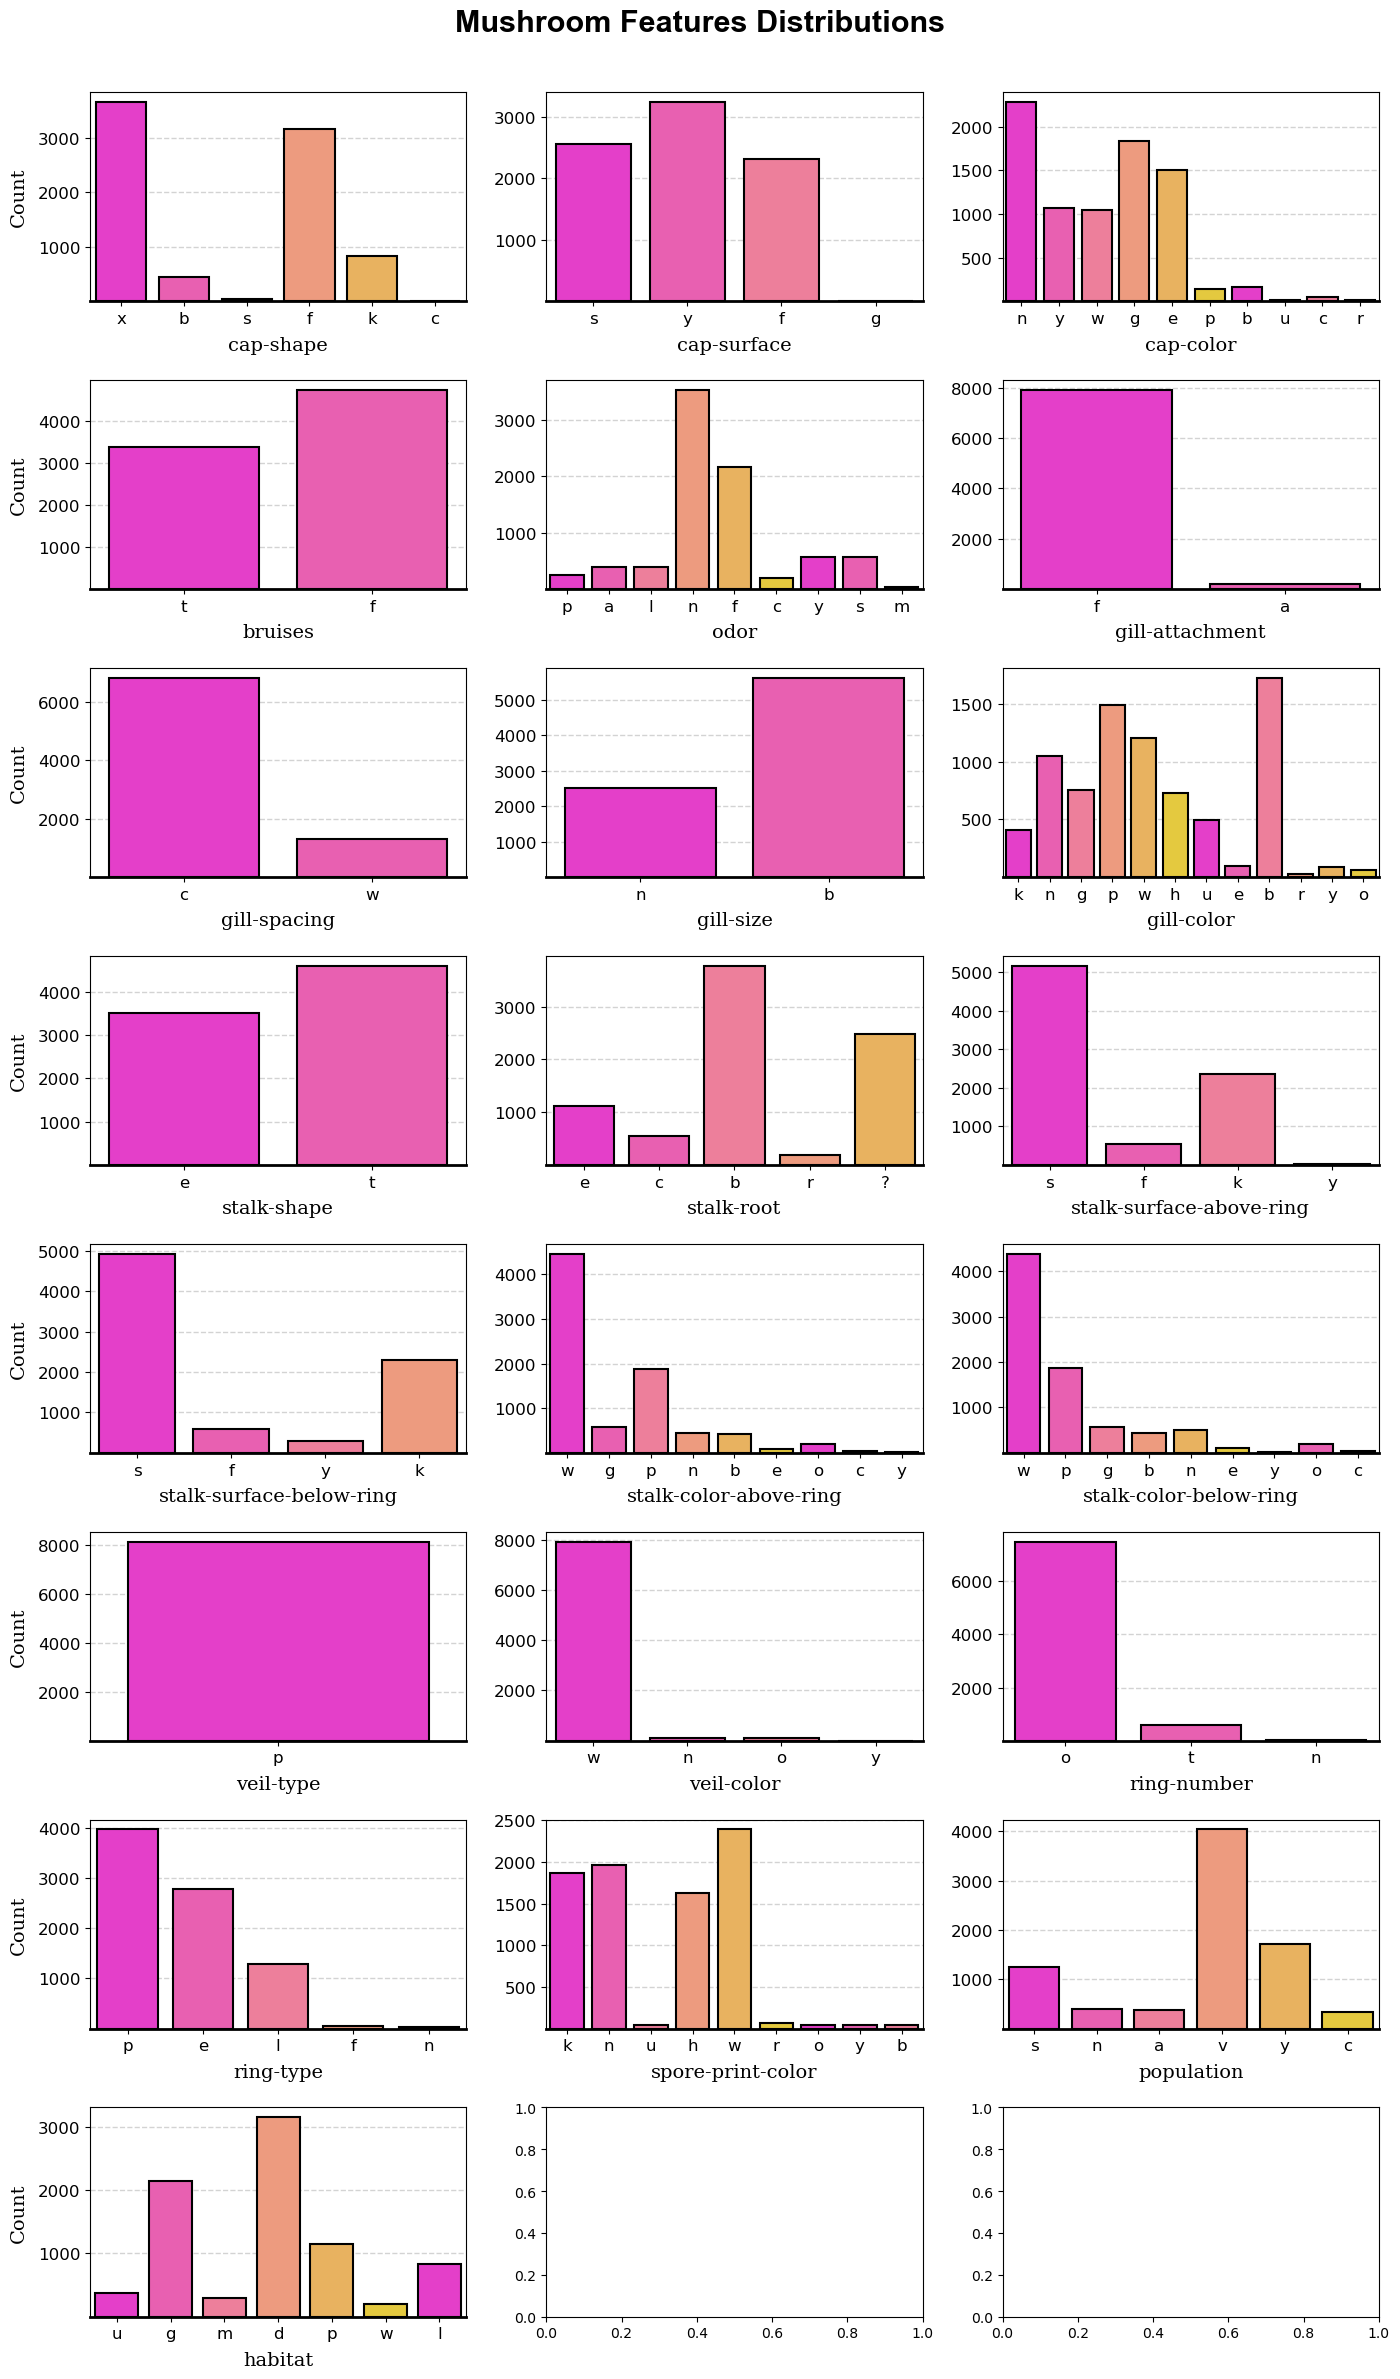

In [56]:
# Define springtime colors
spring_palette = sns.color_palette("spring")

# Assuming 'features' is a list of feature names
rows = 8
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 25))
fig.set_facecolor("#fff")

for idx, feature in enumerate(features):
    ax = axes[idx // cols, idx % cols]  # Calculate subplot index
    ax.set_facecolor("#fff")
    ax.grid(axis="y", linewidth=1, color="lightgrey", linestyle="--", zorder=0)
    sns.countplot(x=feature, palette=spring_palette, data=fungi, ec="black", alpha=1, linewidth=1.5, zorder=2, ax=ax)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel(feature, fontsize=14, fontfamily="serif", labelpad=7)
    ax.set_ylabel("Count" if idx % cols == 0 else "", fontsize=14, fontfamily="serif", labelpad=7)
    ax.spines["bottom"].set(linewidth=2)
    ax.set_ylim(1)
    ax.set_title("")  # Remove title
    
# Set main title
fig.suptitle("Mushroom Features Distributions", fontsize=22, fontweight="bold", fontfamily="Arial")

# Adjust layout
fig.tight_layout(rect=[0.03, 0.03, 0.97, 0.97], w_pad=2, h_pad=1.5)

# Show the plot
plt.show()


# Using chi2_contingency
Imagine you have two categorical variables, like mushroom cap shape (e.g., bell, conical) and mushroom class (e.g., edible, poisonous).
You count how many mushrooms fall into each combination of cap shape and class. This creates a table called a contingency table.

Now, you want to know if there's a significant relationship between cap shape and class. You use chi2_contingency to perform this test.
It looks at the contingency table and tells you if the observed counts are different enough from what you'd expect if cap shape and class were unrelated.

It gives you a p-value, which tells you how likely it is to see the observed counts if there's no relationship between the variables.
If the p-value is small (usually less than 0.05), we conclude there's a significant relationship. If it's large, we don't have enough evidence to say there's a relationship.

So, in the context of the code provided, chi2_contingency is used to check if there's a significant relationship between each mushroom feature (like cap shape, cap color, etc.) and whether the mushroom is edible or poisonous.


IndexError: index 3 is out of bounds for axis 0 with size 3

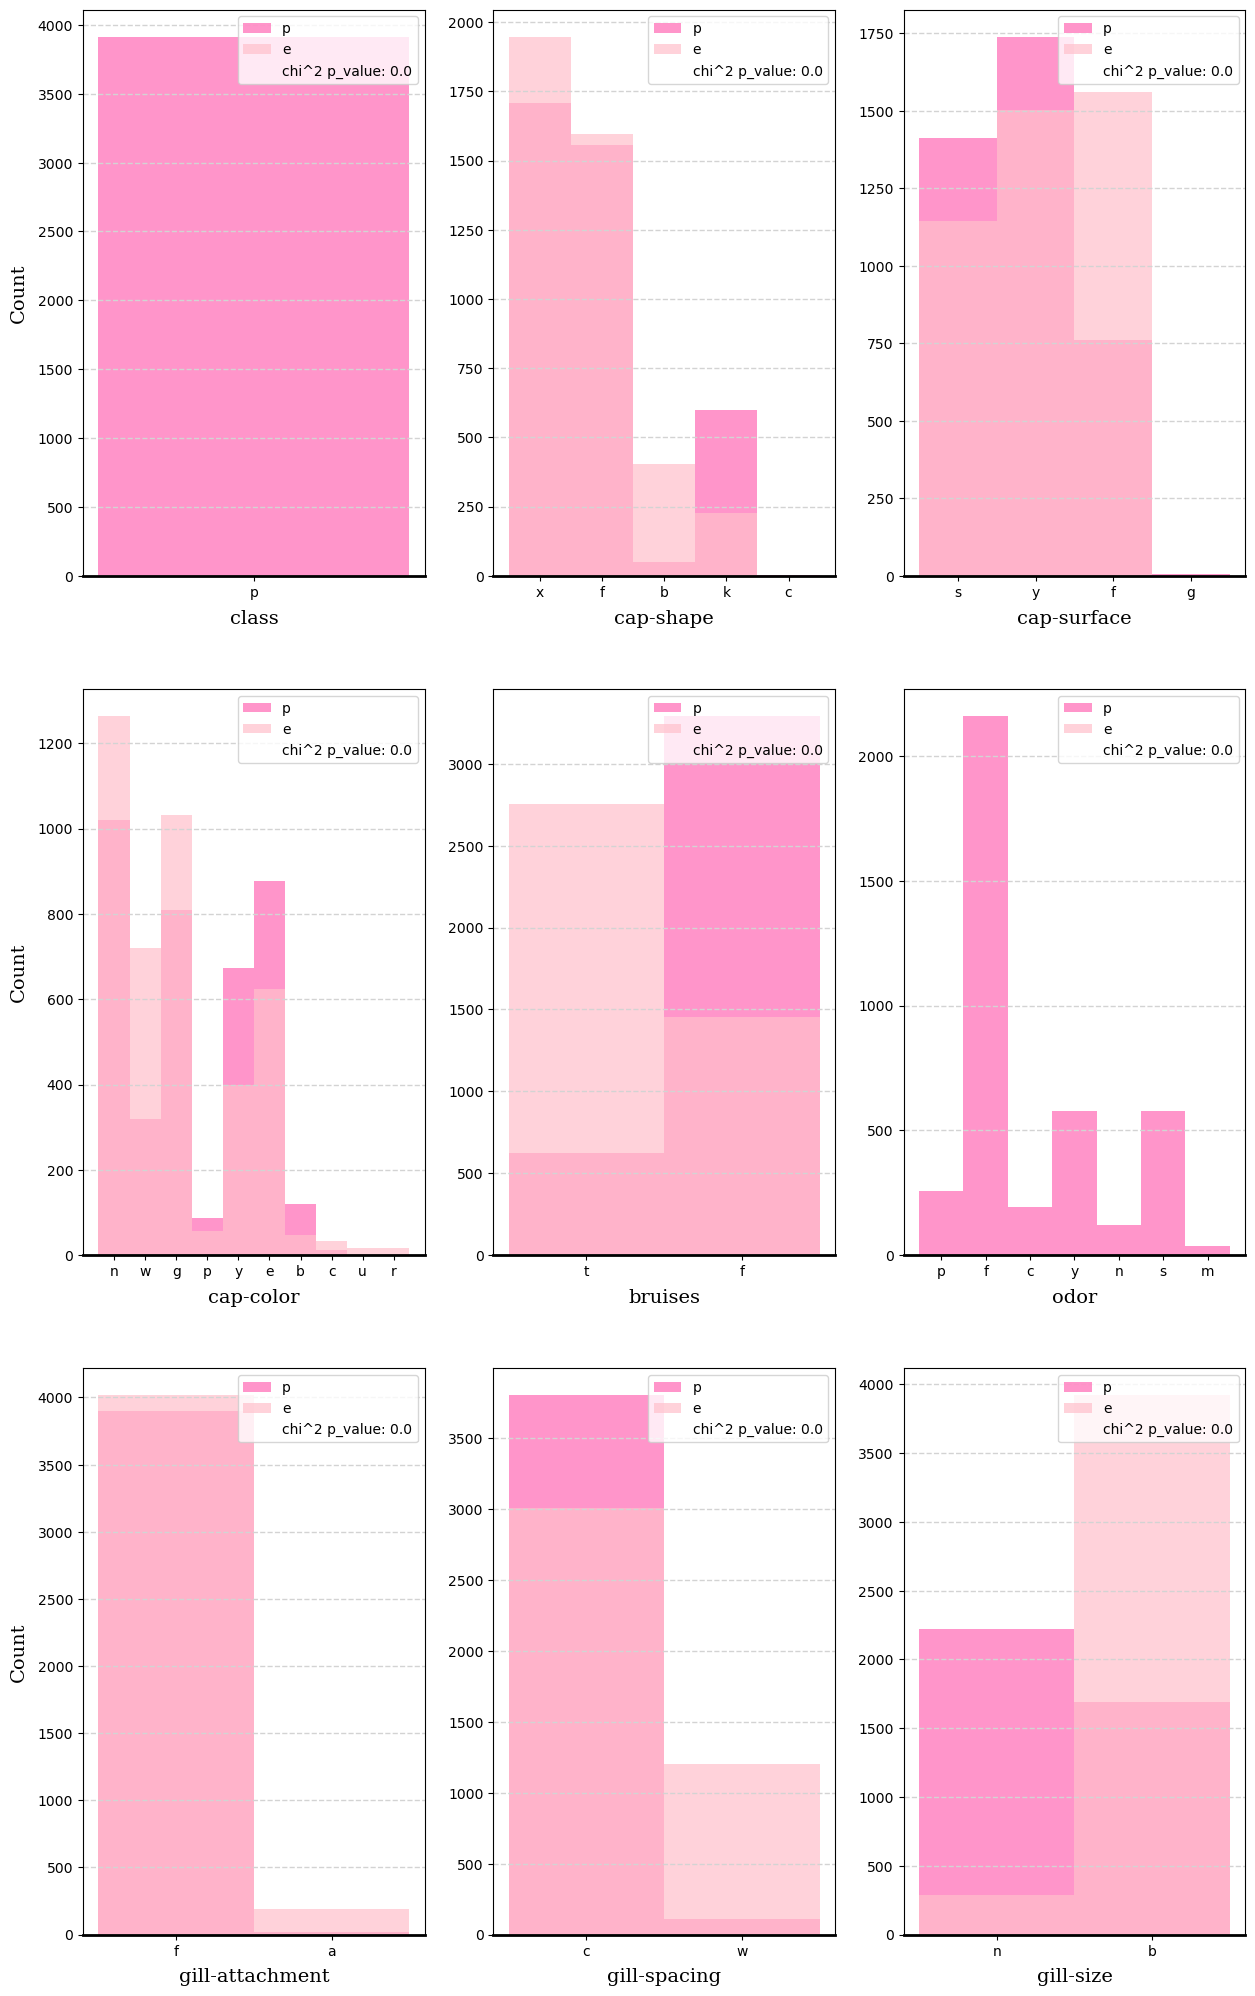

In [57]:

# Define the features
features = fungi.columns[:-1]  # Exclude the target column

# Set up plot parameters
rows = 3
cols = 3
colors = ['#FF69B4', '#FFC0CB']

# Create the figure
fig, axes = plt.subplots(rows, cols, figsize=(15, 25))
fig.set_facecolor("#fff")

# Iterate over features
for idx, feature in enumerate(features):
    ax = axes[idx // cols, idx % cols]  # Calculate subplot index
    ax.set_facecolor("#fff")
    ax.grid(axis="y", linewidth=1, color="lightgrey", linestyle="--", zorder=0)
    
    # Plot histogram for each class
    for cls, color in zip(fungi["class"].unique(), colors):
        data = fungi[fungi["class"] == cls][feature]
        ax.hist(data, color=color, alpha=0.7, bins=np.arange(len(data.unique())+1)-0.5, label=cls)
    
    # Calculate chi-squared p-value
    crosstable = pd.crosstab(fungi[feature], fungi["class"])
    stat, p_value, dof, _ = chi2_contingency(crosstable)
    
    # Set labels and title
    ax.set_xlabel(feature, fontsize=14, fontfamily="serif", labelpad=7)
    ax.set_ylabel("Count" if idx % cols == 0 else "", fontsize=14, fontfamily="serif", labelpad=7)
    ax.spines["bottom"].set(linewidth=2)
    ax.axvline(x=0, label=f"chi^2 p_value: {np.round(p_value, 2)}", visible=False, color="#000")
    ax.set_ylim(0)
    ax.legend()

# Set figure title
fig.suptitle("Mushroom Class - Features Distributions", fontsize=22, fontweight="bold", fontfamily="Arial", y=1.01)

# Adjust layout
fig.tight_layout(rect=[0.03, 0.03, 0.97, 0.97], w_pad=2, h_pad=1.5)

# Show the plot
plt.show()


## Using plotly
~Plotly's interactive exploration feature facilitates in-depth analysis by offering zooming, panning, and hover-over functionalities.

~The professional-looking plots provided by Plotly enhance the visual appeal of my team's visualizations, with clear lines and customizable styles.

~Plotly offers a wide range of plot types, from scatter plots to line graphs, allowing me to choose the most suitable representation for our data.

~Customization is simplified with Plotly, as I can easily adjust colors, labels, and annotations to match my preferences and make our plots stand out.

~Plotly plots are web-friendly, making them ideal for online sharing, web applications, websites, and notebooks.

~Collaboration is seamless with Plotly, as sharing plots with others is effortless, fostering teamwork and knowledge sharing.

~Overall, Plotly has significantly improved my team's data visualization experience, enabling deeper insights and effective communication of findings.

In [ ]:
# Create a scatter plot matrix with color-coded classes
fig = px.scatter_matrix(
    fungi,
    dimensions=features,
    color='class',
    title='Mushroom Class Distributions',
    labels={feat: feat for feat in features},
    category_orders={'class': ['edible', 'poisonous']},
    width=1000,
    height=800
)

# Update layout
fig.update_traces(diagonal_visible=False)  # Hide diagonal plots to avoid repetition
fig.update_layout(title_font_size=24, title_font_family='Arial')

# Show the plot
fig.show()


# Making it ✨ Cute ✨

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_old

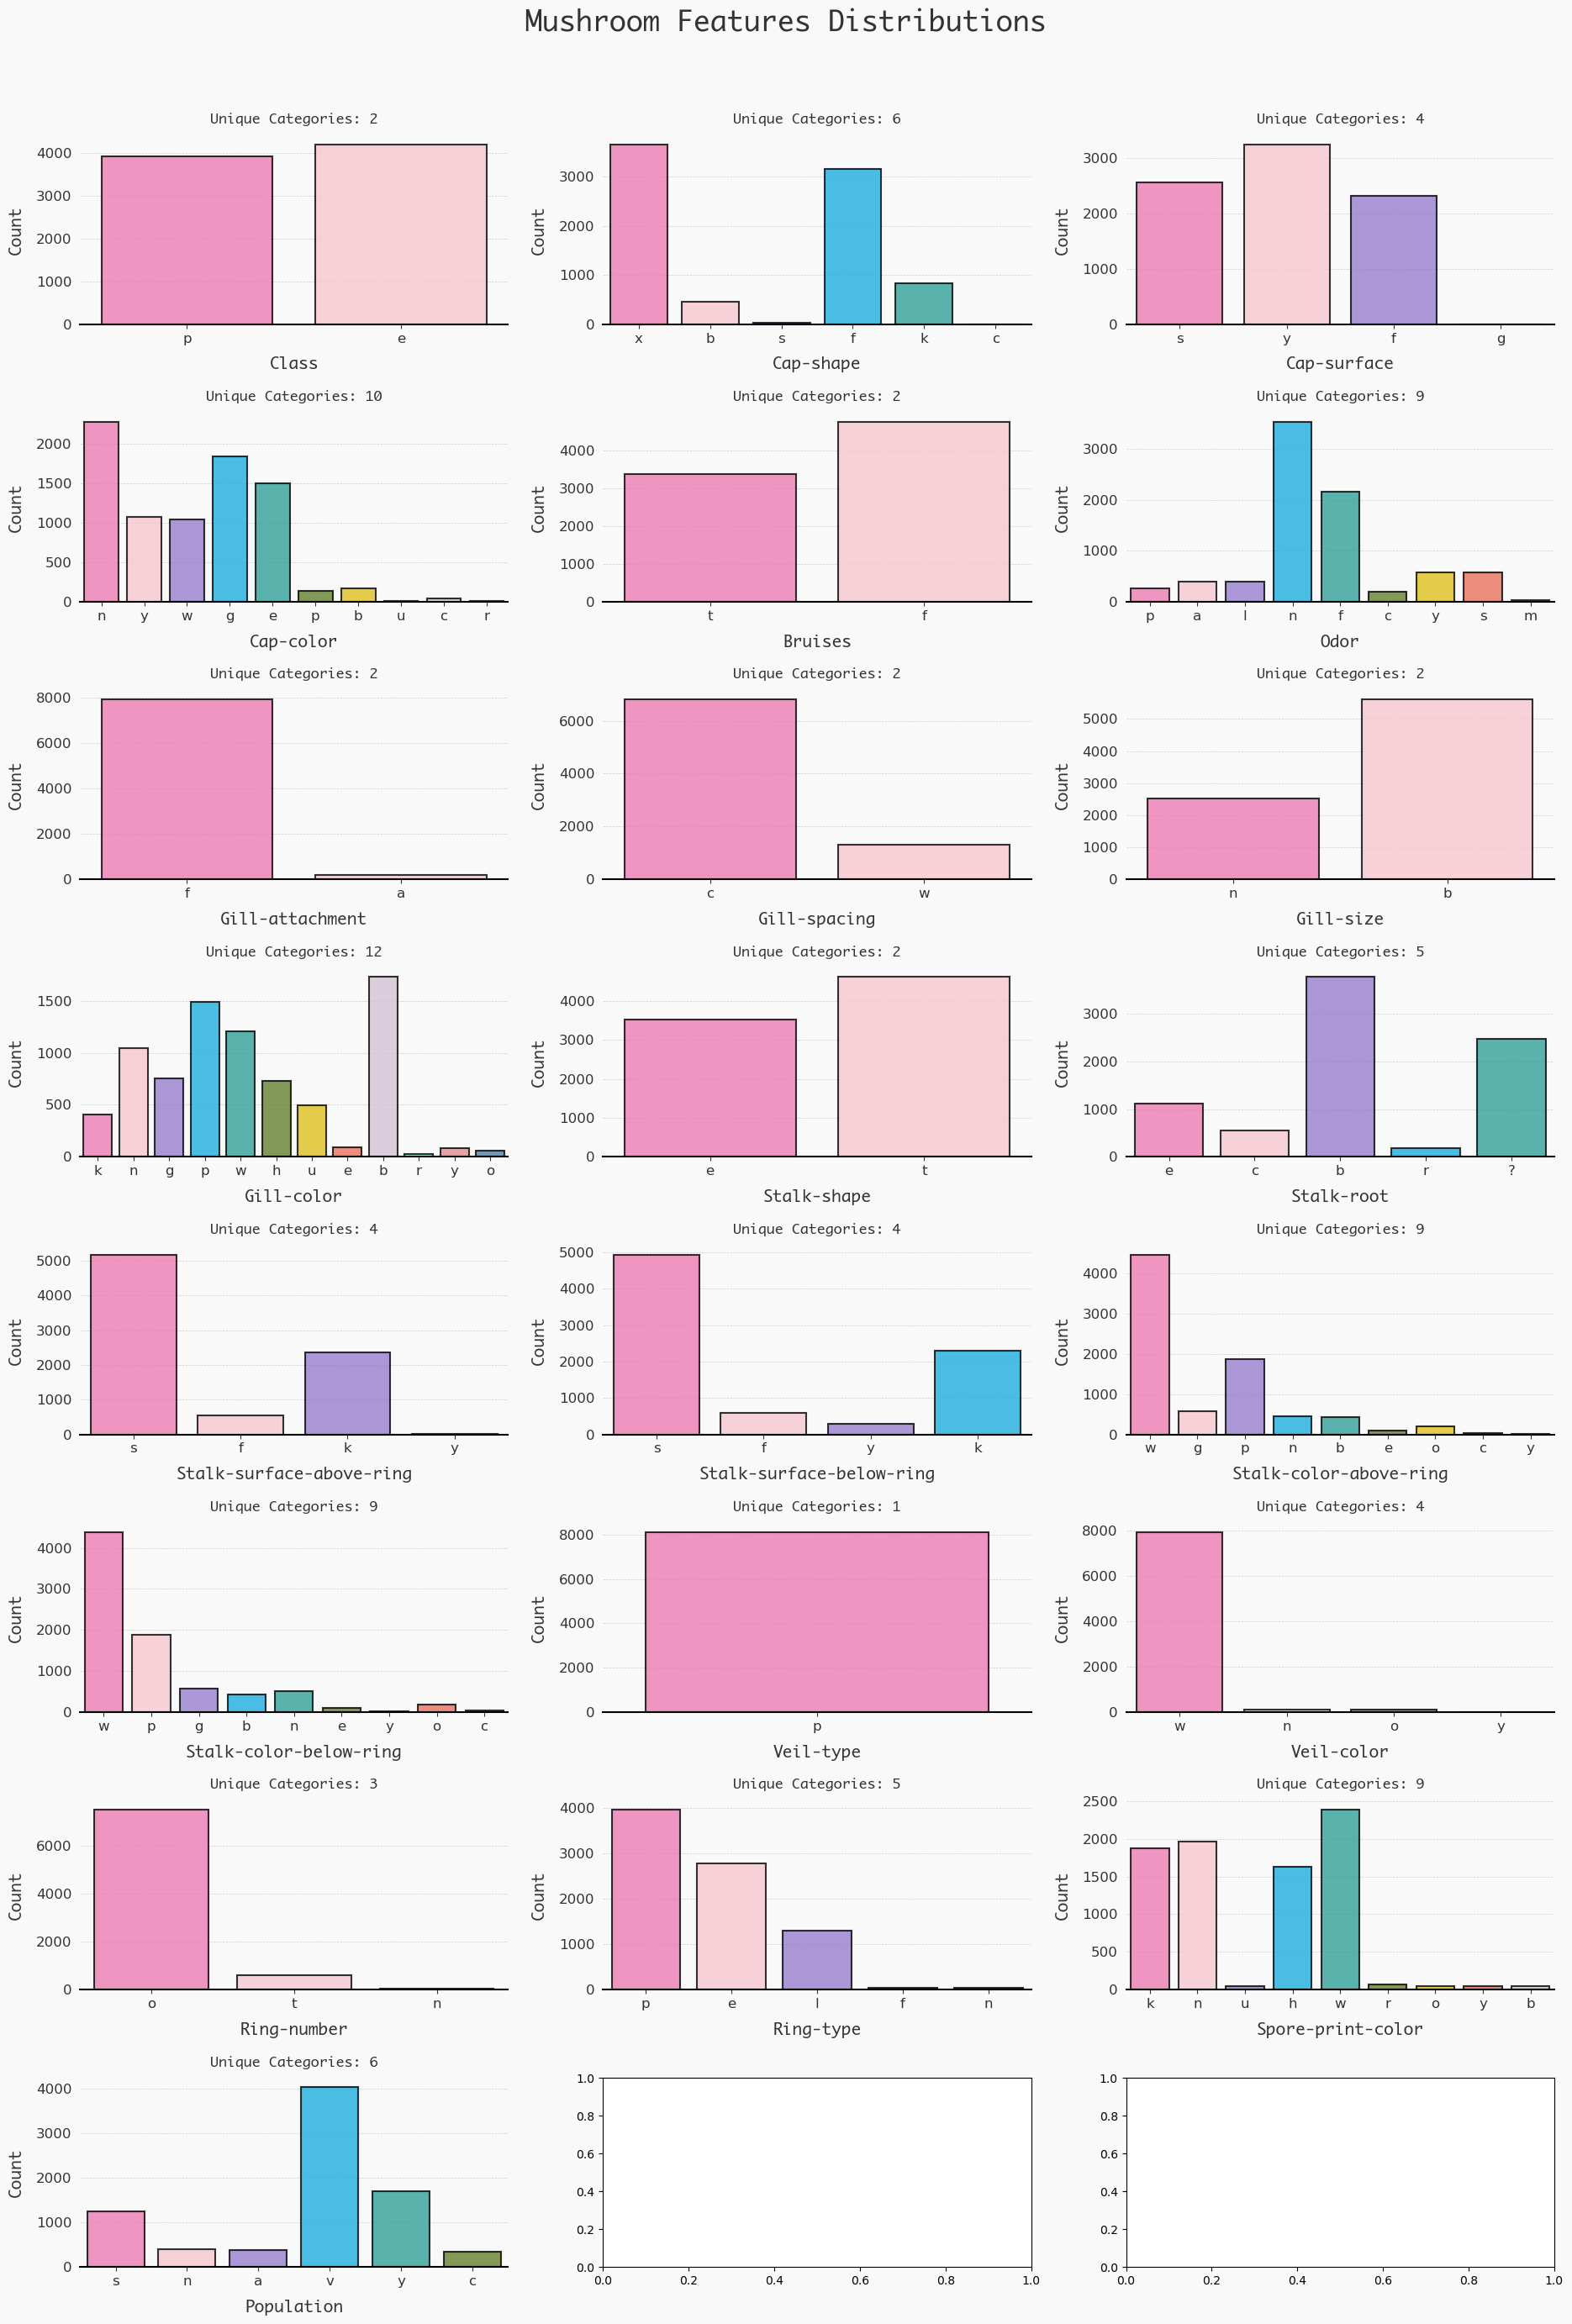

In [58]:
# Define custom color palette
custom_palette = ['#FF69B4', '#FFC0CB', '#9370DB', '#00BFFF', '#20B2AA', '#6B8E23', '#FFD700', '#FF6347', '#D8BFD8', '#7FFFD4', '#F08080', '#4682B4', '#87CEFA']

rows = 8
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(20, 30))
fig.patch.set_facecolor('#f9f9f9')  # Light gray background for the entire figure

for idx, feature in enumerate(features):
    ax = axes[idx // cols, idx % cols]  # Calculate subplot index
    ax.set_facecolor("#f9f9f9")  # Light gray subplot background
    ax.grid(axis="y", linewidth=0.5, color="#cccccc", linestyle="--", zorder=0)  # Light grid lines
    
    # Plot countplot with custom color palette
    sns.countplot(x=feature, palette=custom_palette, data=fungi, ec="black", alpha=0.8, linewidth=1.5, zorder=2, ax=ax)
    
    # Set axis labels and font properties
    ax.set_xlabel(feature.capitalize(), fontsize=14, fontweight='bold', fontfamily="Monaco", labelpad=10, color="#333333")
    ax.set_ylabel("Count", fontsize=14, fontweight='bold', fontfamily="Monaco", labelpad=10, color="#333333")
    ax.tick_params(axis='both', which='major', labelsize=12, colors="#333333")  # Set tick color
    
    # Remove spines except for bottom
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_linewidth(1.5)  # Thicker bottom spine
    
    # Remove y-axis ticks to save space
    ax.tick_params(axis='y', left=False)
    
    # Set subplot title with annotation (number of unique categories)
    unique_categories = len(fungi[feature].unique())
    ax.set_title(f"Unique Categories: {unique_categories}", fontsize=12, fontweight='bold', fontfamily="Monaco", pad=10, color="#333333")  
    
# Set main title with better positioning and font properties
fig.suptitle("Mushroom Features Distributions", fontsize=24, fontweight="bold", fontfamily="Monaco", y=0.95, color="#333333")

# Adjust layout to avoid overlapping titles
fig.tight_layout(rect=[0.03, 0.03, 0.97, 0.93], w_pad=2, h_pad=1.5)

# Show the plot
plt.show()


## Mushroom Classification Features Relationships

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_old

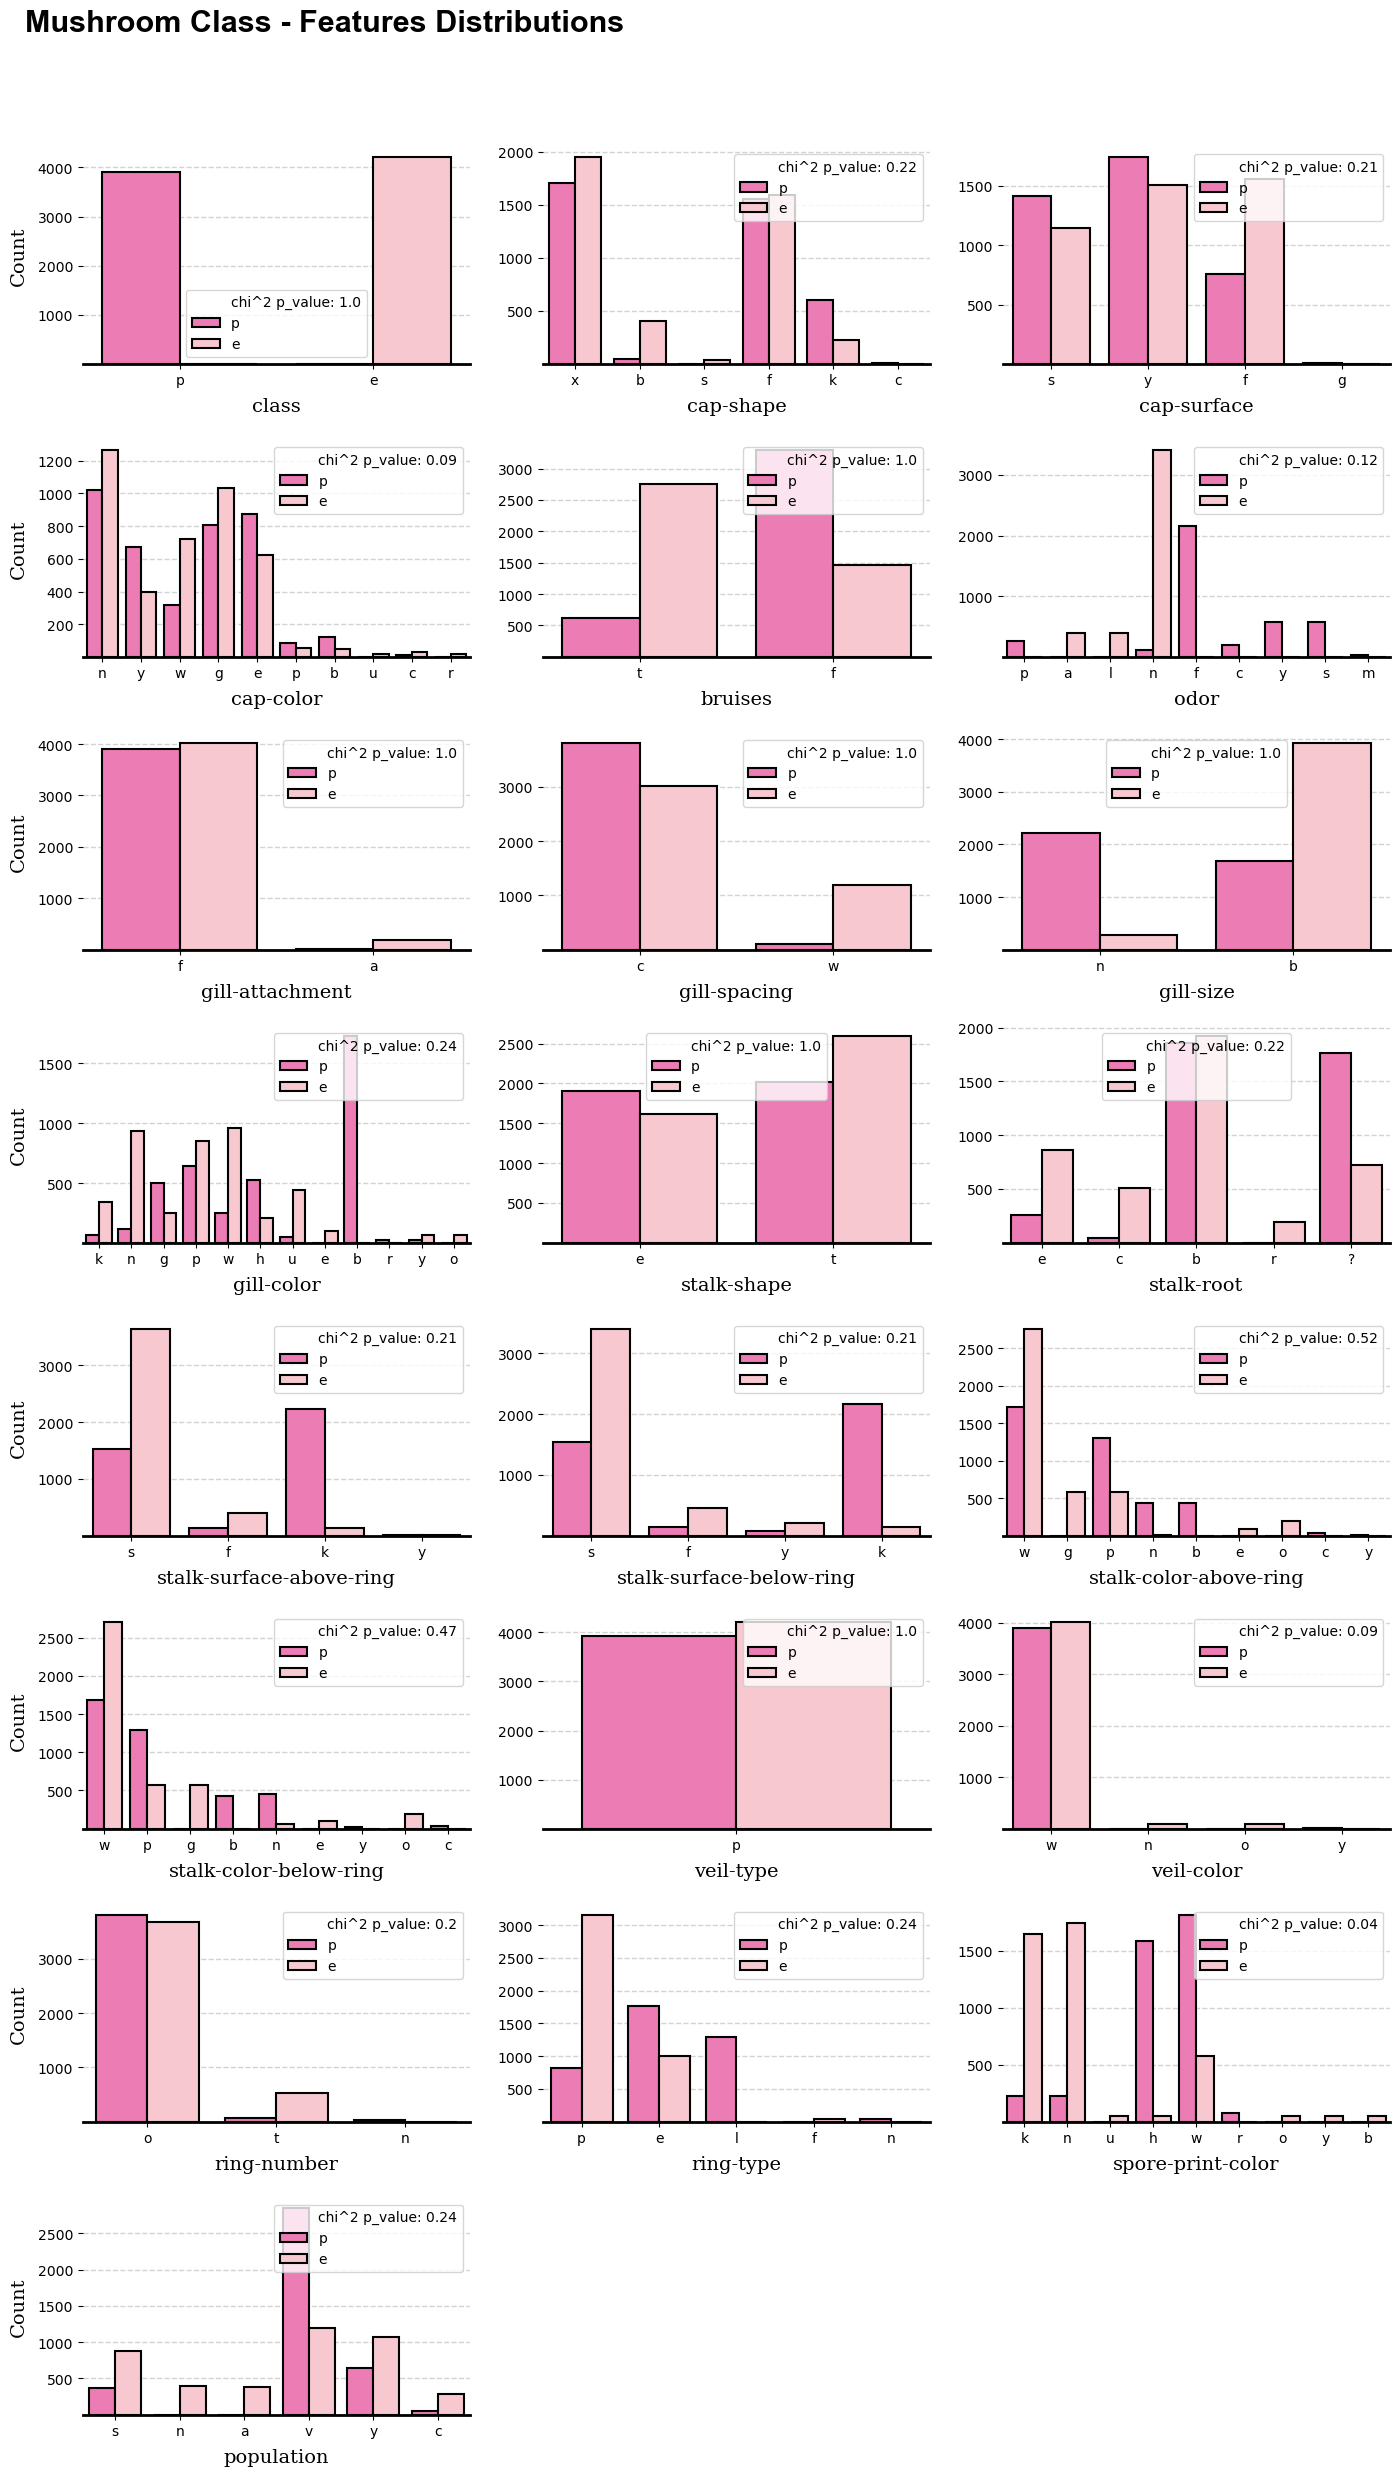

In [59]:
rows = 8
cols = 3
magma_palette = sns.color_palette("spring")
fig = plt.figure(figsize=(15, 25))
fig.set_facecolor("#fff")
for idx, feature in enumerate(features):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.set_facecolor("#fff")
    ax.grid(axis="y", linewidth=1, color="lightgrey", linestyle="--", zorder=0)
    sns.countplot(x=feature, palette=colors, hue="class", data=fungi, ec="#000", alpha=1, linewidth=1.5, zorder=2)
    
    feature_data_p = fungi[fungi["class"] == "p"][feature].value_counts()
    feature_data_e = fungi[fungi["class"] == "e"][feature].value_counts()
    
    for idx_p in feature_data_p.index:
        if idx_p not in feature_data_e.index:
            feature_data_e[idx_p] = 0
    
    for idx_e in feature_data_e.index:
        if idx_e not in feature_data_p.index:
            feature_data_p[idx_e] = 0
    
    
    feature_data_p = feature_data_p.sort_index()
    feature_data_e = feature_data_e.sort_index()
    crosstable = pd.crosstab(feature_data_p.values, feature_data_e.values)
    stat, p_value, dof , _ = chi2_contingency(crosstable)
    
    if idx % cols == 0:
        ax.set_ylabel("Count", fontsize=14, fontfamily="serif", labelpad=7)
    else:
        ax.set_ylabel("")
        
    ax.set_xlabel(feature, fontsize=14, fontfamily="serif", labelpad=7)
    hide_spines(ax, spines=["top", "right", "left"])
    ax.spines["bottom"].set(linewidth=2)
    ax.axvline(x=0, label=f"chi^2 p_value: {np.round(p_value, 2)}", visible=False, color="#000")
    ax.set_ylim(1)
    ax.legend()

fig.text(x=0.05, y=1.01, s="Mushroom Class - Features Distributions", fontsize=22, fontweight="bold", fontfamily="Arial")
fig.tight_layout(rect=[0.03, 0.03, 0.97, 0.97], w_pad=2, h_pad=1.5)
fig.show()


## Mushroom Features Humans Can Identify 

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/samuelvincentneal/anaconda3/lib/python3.11/site-packages/seaborn/_old

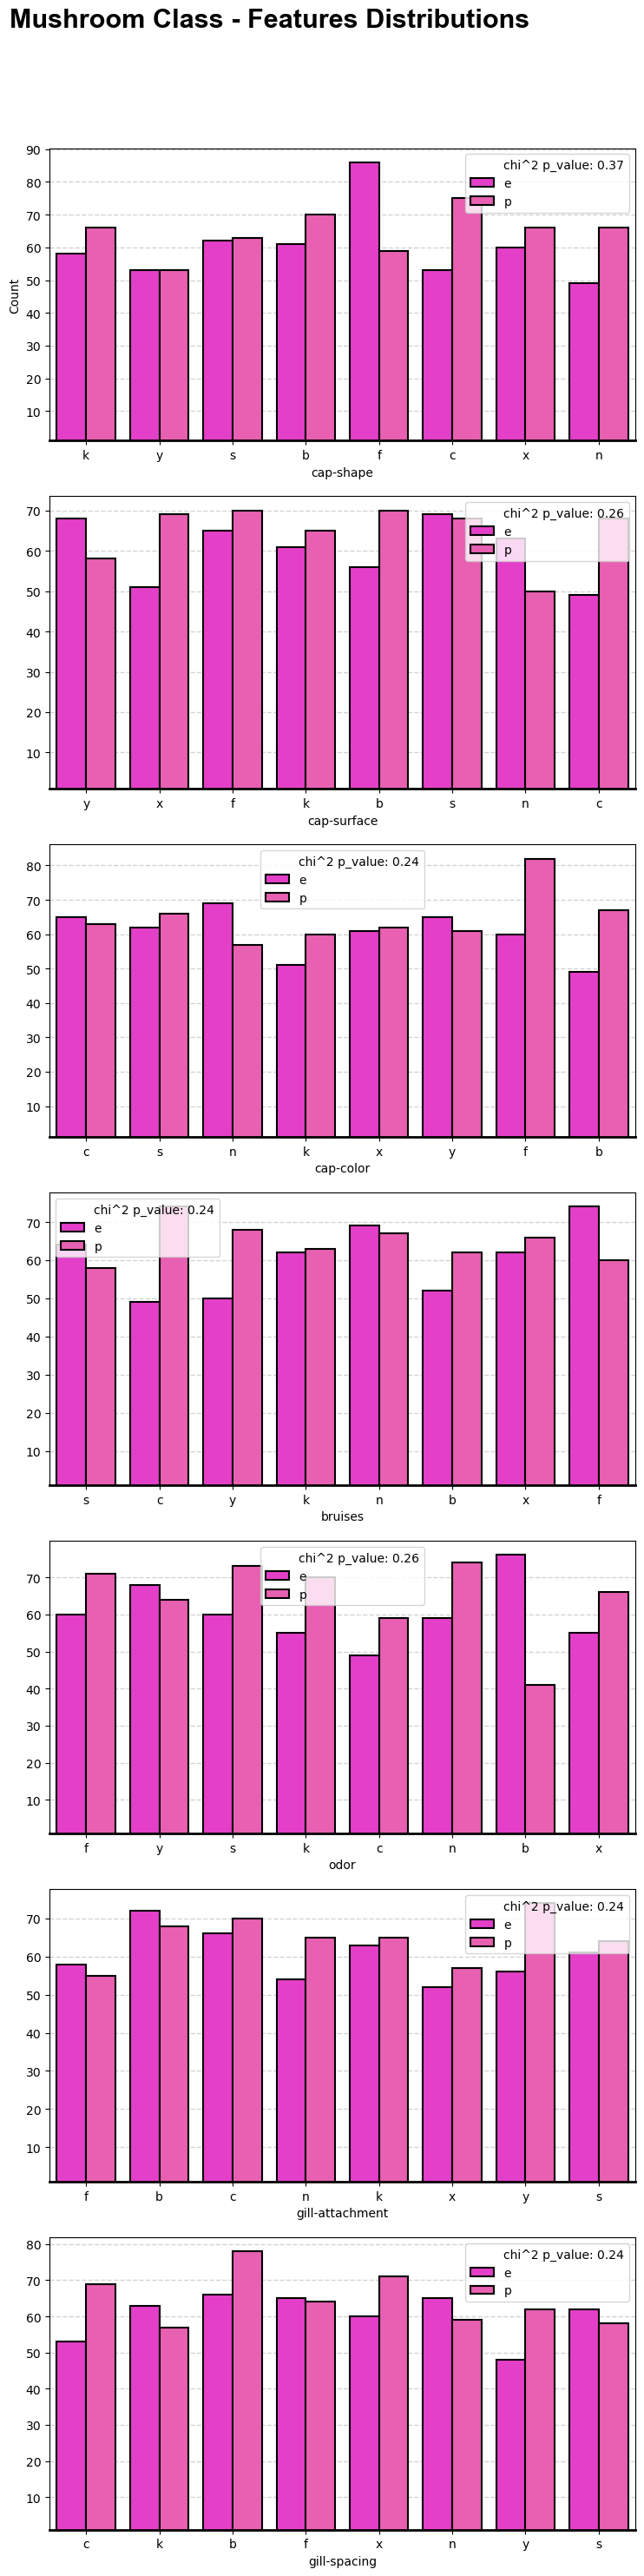

In [60]:

#Data sampling 
np.random.seed(0)
features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing']
class_labels = ['e', 'p']
data = {feature: np.random.choice(['b', 'c', 'x', 'f', 'k', 's', 'n', 'y'], size=1000) for feature in features}
data['class'] = np.random.choice(class_labels, size=1000)
fungi = pd.DataFrame(data)

# Plotting
rows = 7
cols = 1
magma_palette = sns.color_palette("spring")

fig, axes = plt.subplots(rows, cols, figsize=(8, 30))
fig.patch.set_facecolor("#fff")

for idx, feature in enumerate(features):
    ax = axes[idx]
    ax.set_facecolor("#fff")
    ax.grid(axis="y", linewidth=1, color="lightgrey", linestyle="--", zorder=0)
    
    sns.countplot(x=feature, palette=magma_palette, hue="class", data=fungi, ec="#000", alpha=1, linewidth=1.5, zorder=2, ax=ax)
    
    feature_data_p = fungi[fungi["class"] == "p"][feature].value_counts()
    feature_data_e = fungi[fungi["class"] == "e"][feature].value_counts()
    
    for idx_p in feature_data_p.index:
        if idx_p not in feature_data_e.index:
            feature_data_e[idx_p] = 0
    
    for idx_e in feature_data_e.index:
        if idx_e not in feature_data_p.index:
            feature_data_p[idx_e] = 0
    
    feature_data_p = feature_data_p.sort_index()
    feature_data_e = feature_data_e.sort_index()
    crosstable = pd.crosstab(feature_data_p.values, feature_data_e.values)
    stat, p_value, dof , _ = chi2_contingency(crosstable)
    
    ax.set_ylabel("Count" if idx == 0 else "")
    ax.set_xlabel(feature)
    ax.spines["bottom"].set(linewidth=2)
    ax.axvline(x=0, label=f"chi^2 p_value: {np.round(p_value, 2)}", visible=False, color="#000")
    ax.set_ylim(1)
    ax.legend()

fig.text(x=0.05, y=1.01, s="Mushroom Class - Features Distributions", fontsize=22, fontweight="bold", fontfamily="Arial")
fig.tight_layout(rect=[0.03, 0.03, 0.97, 0.97], w_pad=2, h_pad=1.5)
plt.show()


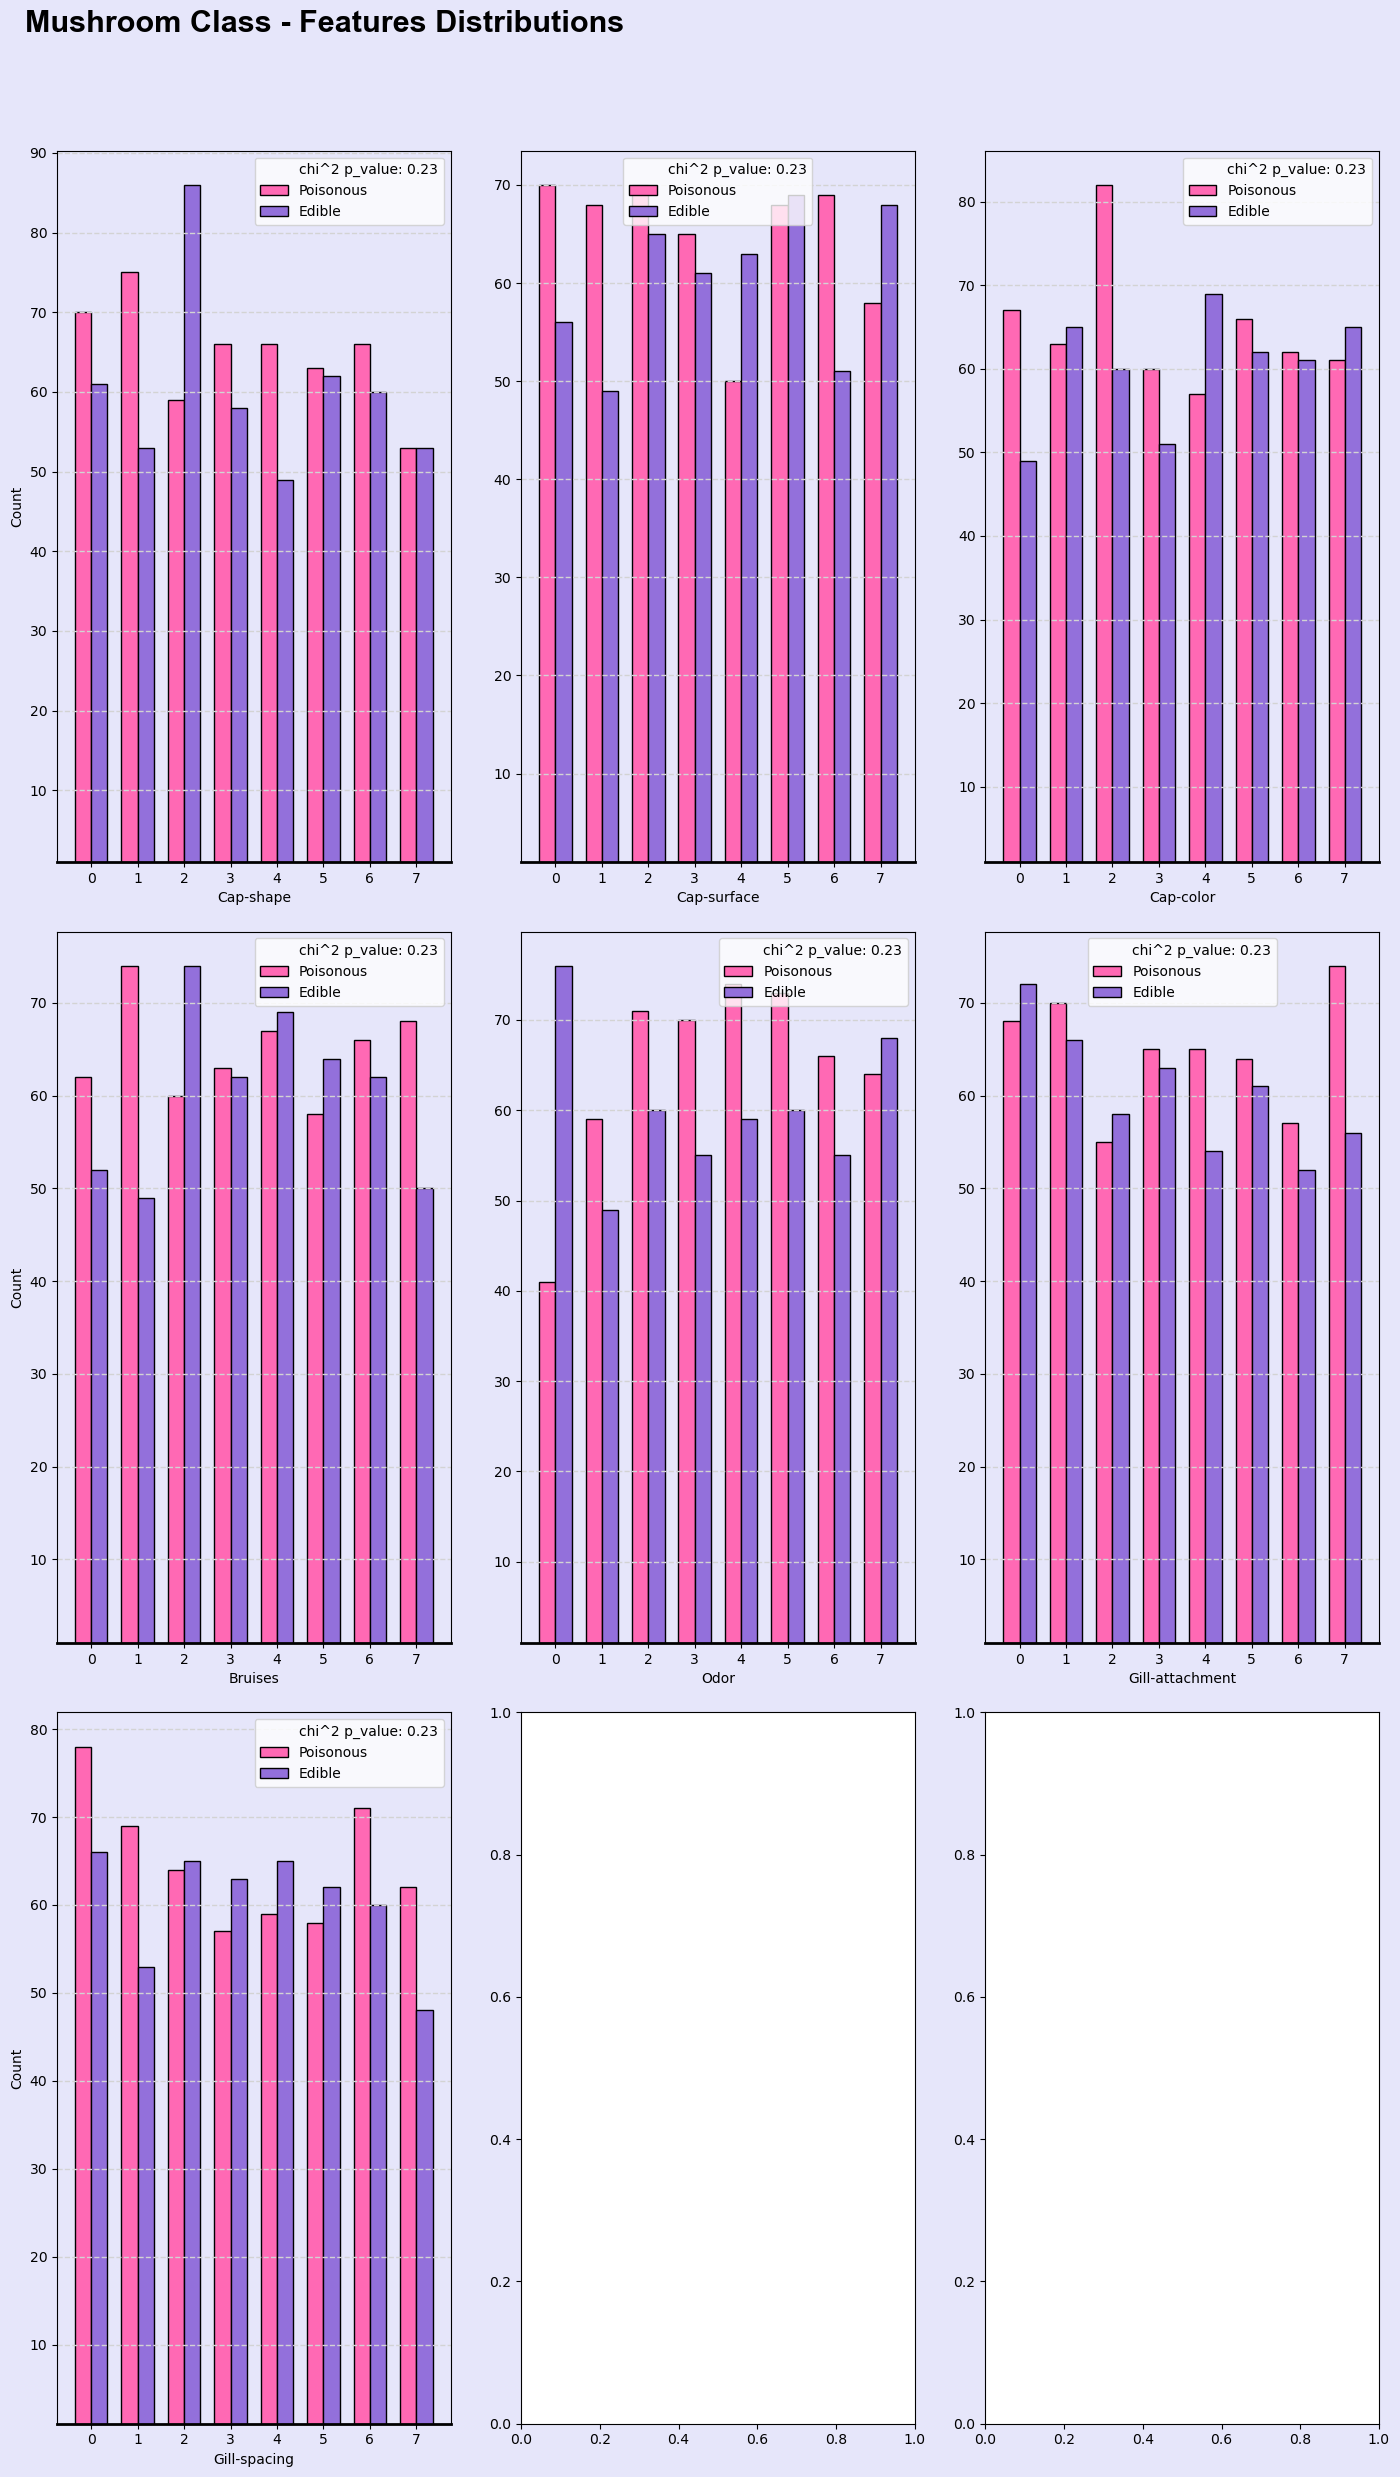

In [61]:
# Data sampling
np.random.seed(0)
features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing']
class_labels = ['e', 'p']
data = {feature: np.random.choice(['b', 'c', 'x', 'f', 'k', 's', 'n', 'y'], size=1000) for feature in features}
data['class'] = np.random.choice(class_labels, size=1000)
fungi = pd.DataFrame(data)

# Plotting
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 25), facecolor='#E6E6FA')  # Light purple background
colors = ['#FF69B4', '#9370DB']  # Pink for poisonous, purple for edible

for idx, feature in enumerate(features):
    ax = axes[idx // cols, idx % cols]
    ax.set_facecolor("#E6E6FA")  # Light purple subplot background
    ax.grid(axis="y", linewidth=1, color="lightgrey", linestyle="--", zorder=0)
    
    p_counts = fungi[fungi["class"] == "p"][feature].value_counts().sort_index()
    e_counts = fungi[fungi["class"] == "e"][feature].value_counts().sort_index()
    
    x = np.arange(len(p_counts))
    width = 0.35
    
    ax.bar(x - width/2, p_counts, width, label='Poisonous', color=colors[0], edgecolor='black')
    ax.bar(x + width/2, e_counts, width, label='Edible', color=colors[1], edgecolor='black')
    
    ax.set_ylabel("Count" if idx % cols == 0 else "")
    ax.set_xlabel(feature.capitalize())
    ax.spines["bottom"].set(linewidth=2)
    
    crosstable = pd.crosstab(p_counts.index, e_counts.index)
    stat, p_value, dof , _ = chi2_contingency(crosstable)
    ax.axvline(x=0, label=f"chi^2 p_value: {np.round(p_value, 2)}", visible=False, color="#000")
    ax.set_ylim(1)
    ax.legend()

fig.text(x=0.05, y=1.01, s="Mushroom Class - Features Distributions", fontsize=22, fontweight="bold", fontfamily="Arial")
fig.tight_layout(rect=[0.03, 0.03, 0.97, 0.97], w_pad=2, h_pad=1.5)
plt.show()


## Using bubbles 

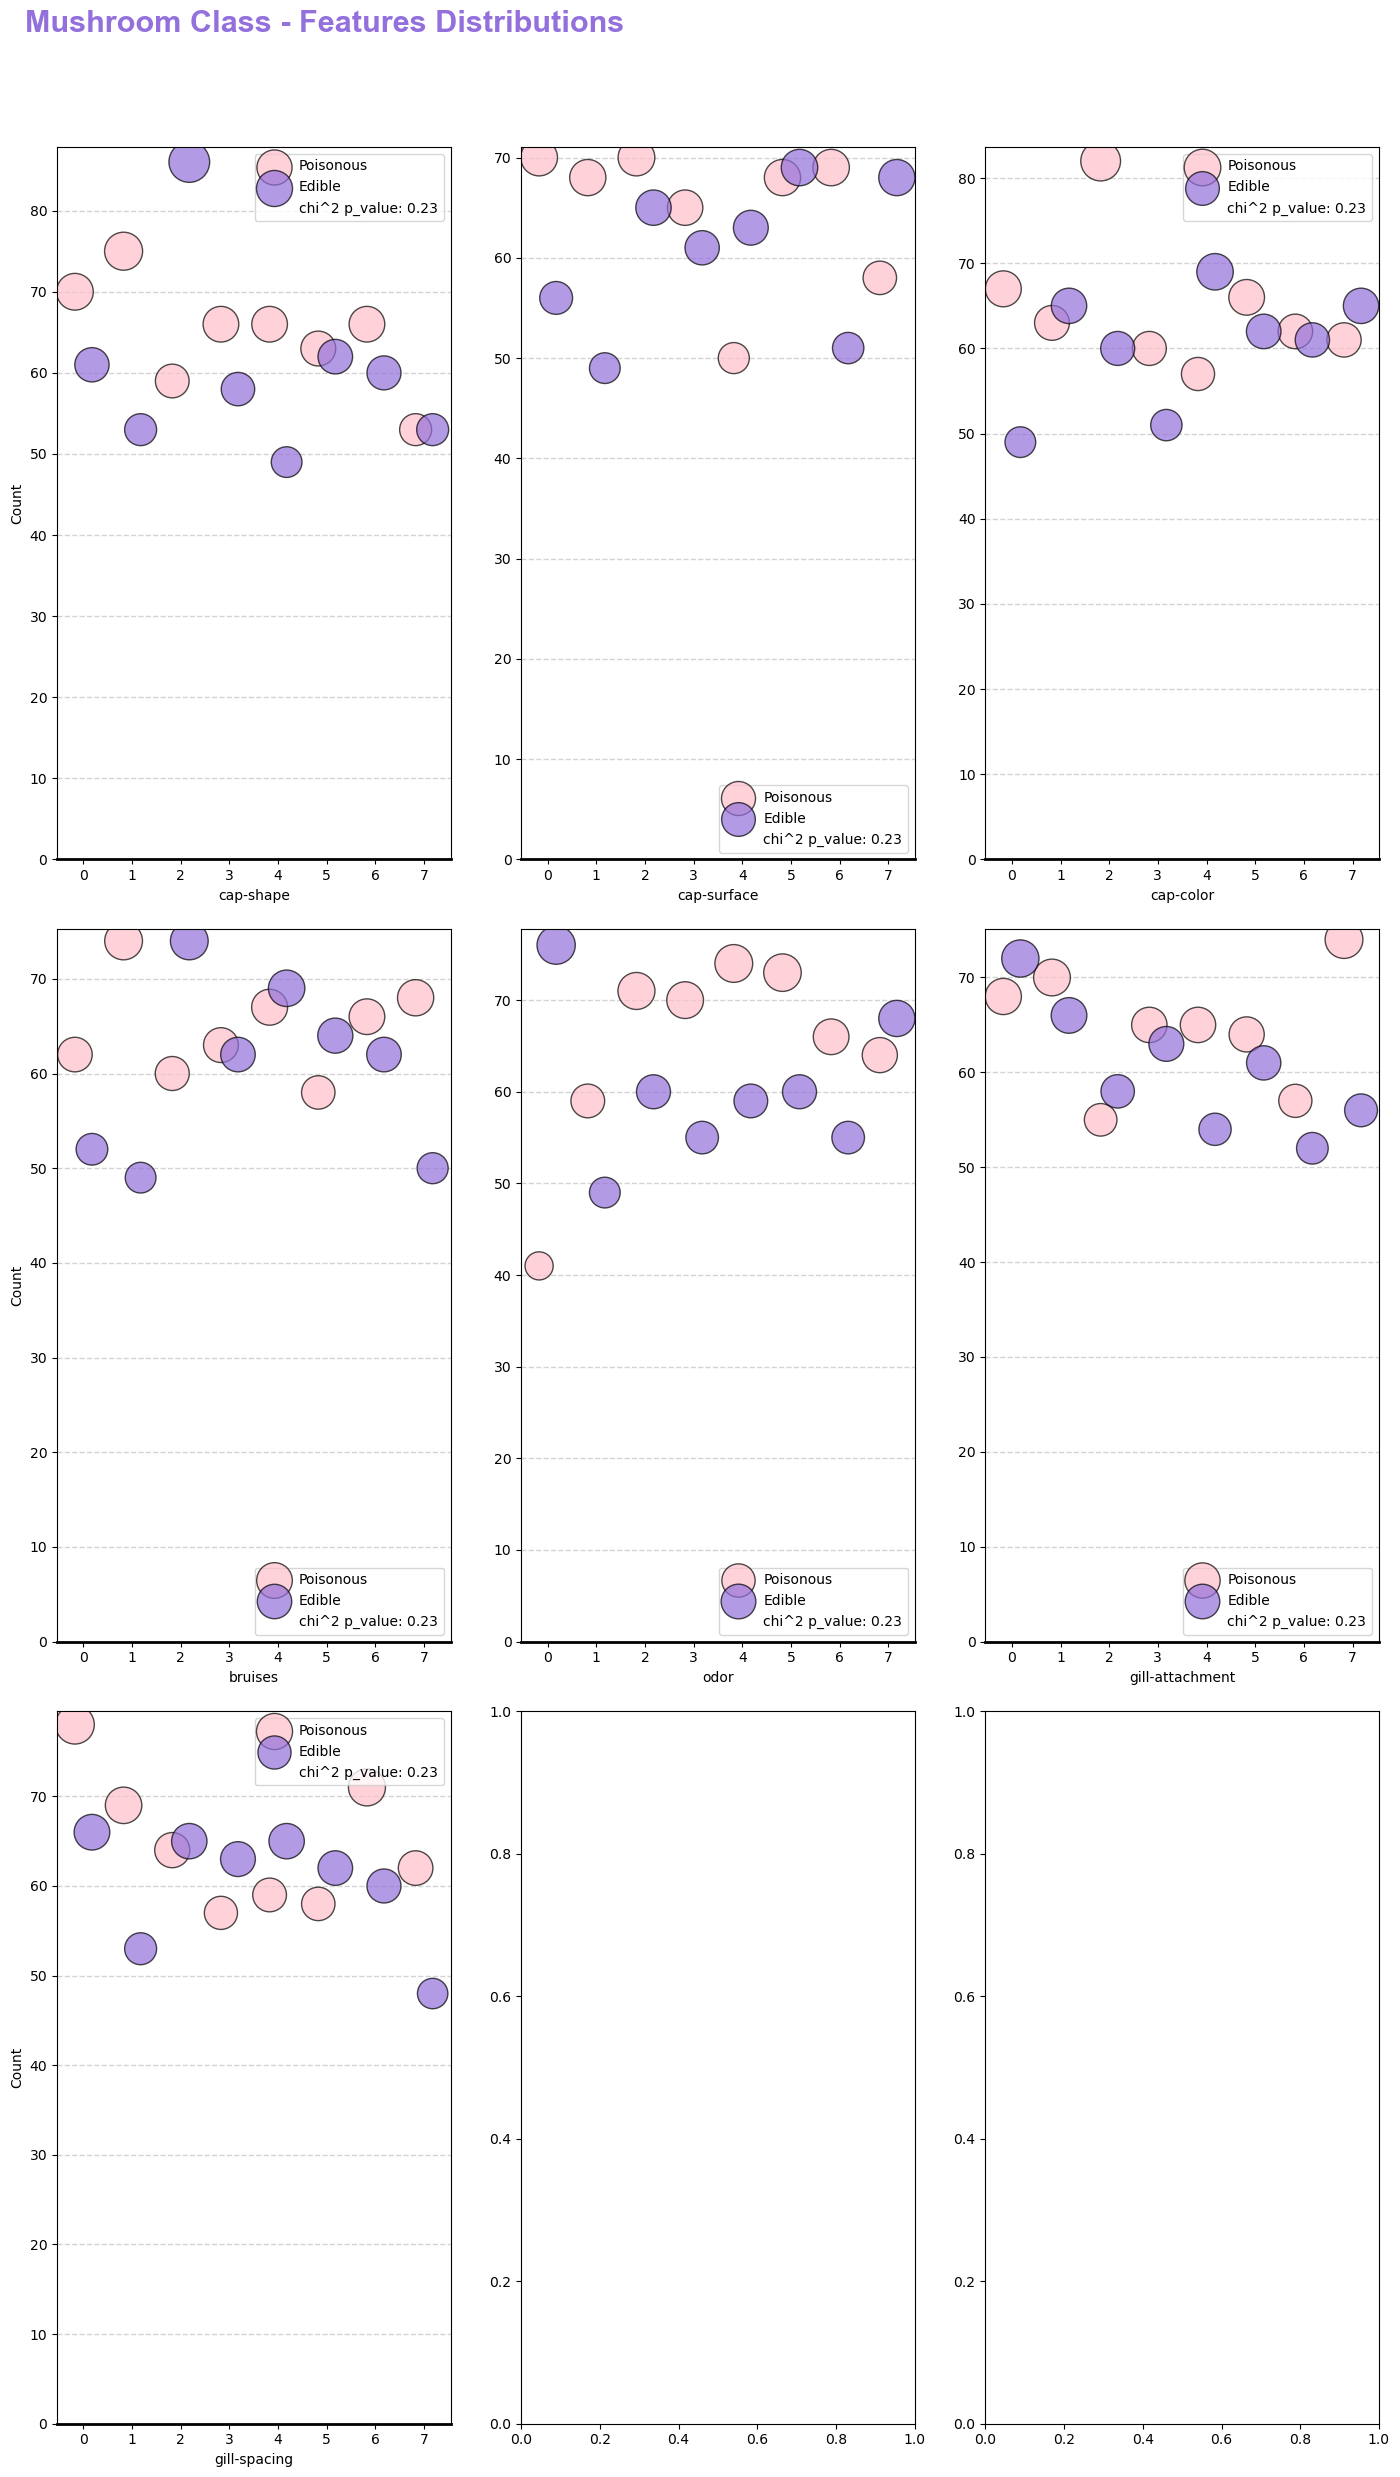

In [62]:

# Sampling Data
np.random.seed(0)
features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing']
class_labels = ['e', 'p']
data = {feature: np.random.choice(['b', 'c', 'x', 'f', 'k', 's', 'n', 'y'], size=1000) for feature in features}
data['class'] = np.random.choice(class_labels, size=1000)
fungi = pd.DataFrame(data)

# Plotting
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 25), facecolor='#fff')
pink = '#FFC0CB'
purple = '#9370DB'

for idx, feature in enumerate(features):
    ax = axes[idx // cols, idx % cols]
    ax.set_facecolor("#fff")
    ax.grid(axis="y", linewidth=1, color="lightgrey", linestyle="--", zorder=0)
    
    p_counts = fungi[fungi["class"] == "p"][feature].value_counts().sort_index()
    e_counts = fungi[fungi["class"] == "e"][feature].value_counts().sort_index()
    
    x = np.arange(len(p_counts))
    width = 0.35
    
    ax.scatter(x - width/2, p_counts, s=p_counts*10, label='Poisonous', color=pink, edgecolor='black', alpha=0.7, zorder=2)
    ax.scatter(x + width/2, e_counts, s=e_counts*10, label='Edible', color=purple, edgecolor='black', alpha=0.7, zorder=2)
    
    ax.set_ylabel("Count" if idx % cols == 0 else "")
    ax.set_xlabel(feature)
    ax.spines["bottom"].set(linewidth=2)
    
    crosstable = pd.crosstab(p_counts.index, e_counts.index)
    stat, p_value, dof , _ = chi2_contingency(crosstable)
    ax.axvline(x=0, label=f"chi^2 p_value: {np.round(p_value, 2)}", visible=False, color="#000")
    ax.set_ylim(0)
    ax.legend()

fig.text(x=0.05, y=1.01, s="Mushroom Class - Features Distributions", fontsize=22, fontweight="bold", fontfamily="Arial", color=purple)
fig.tight_layout(rect=[0.03, 0.03, 0.97, 0.97], w_pad=2, h_pad=1.5)
plt.show()


## Using 💖 plotly and chi2 💖together (super interactive)

In [63]:
# Sampling data
np.random.seed(0)
features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing']
class_labels = ['e', 'p']
data = {feature: np.random.choice(['b', 'c', 'x', 'f', 'k', 's', 'n', 'y'], size=1000) for feature in features}
data['class'] = np.random.choice(class_labels, size=1000)
fungi = pd.DataFrame(data)

# Compute the count of each category for both classes
bubble_data_p = fungi[fungi["class"] == "p"].melt(value_vars=features, var_name="feature", value_name="category").value_counts().reset_index(name="count")
bubble_data_e = fungi[fungi["class"] == "e"].melt(value_vars=features, var_name="feature", value_name="category").value_counts().reset_index(name="count")

# Merge the data for both classes
bubble_data = pd.merge(bubble_data_p, bubble_data_e, on=["feature", "category"], suffixes=("_p", "_e"), how="outer").fillna(0)

# Compute the size of each bubble based on the total count
bubble_data["total_count"] = bubble_data["count_p"] + bubble_data["count_e"]
bubble_data["size"] = bubble_data["total_count"].apply(lambda x: np.sqrt(x))

# Create the interactive bubble plot using Plotly Express
fig = px.scatter(bubble_data, x="category", y="feature", size="size", color="feature",
                 hover_name="category", hover_data={"size": False, "count_p": True, "count_e": True, "total_count": True},
                 labels={"feature": "Feature", "category": "Category", "size": "Total Count"},
                 title="Mushroom Class - Features Distributions",
                 color_discrete_sequence=px.colors.qualitative.Pastel1)

# Set background color to light pink
fig.update_layout(
    plot_bgcolor="rgb(255, 228, 225)"  # Light pink color code
)

# Show the plot
fig.show()
